<a href="https://colab.research.google.com/github/jaeyoonjeong9024/7weeks/blob/main/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [26]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('/content/TSLA.csv')

# 필요한 컬럼(Open, High, Low, Close)만 선택
features = ['Open', 'High', 'Low', 'Close']
data = df[features].values

# 2. 정규화 (0~1 스케일링)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [27]:
# 3. 시퀀스 생성 및 훈련/테스트 데이터 분리
window = 3      # 3일치 데이터를 기반으로 예측
n_features = 4  # 피처 개수 (Open, High, Low, Close)

X, y = [], []

for i in range(len(data_scaled) - window):
    # i부터 3일(window)간의 4개 피처 데이터를 X에 추가
    X.append(data_scaled[i:i+window])
    # 3일(window) 뒤의 4개 피처(Open, High, Low, Close)를 y에 추가
    y.append(data_scaled[i+window])

# Numpy 배열로 변환
X, y = np.array(X), np.array(y)

# 80% 훈련, 20% 테스트 분리
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Train data (X, y): {X_train.shape}, {y_train.shape}")
print(f"Test data (X, y): {X_test.shape}, {y_test.shape}")

Train data (X, y): (2362, 3, 4), (2362, 4)
Test data (X, y): (591, 3, 4), (591, 4)


In [28]:
# 4. SimpleRNN 모델 정의 및 훈련
model_rnn = tf.keras.Sequential([
    # SimpleRNN 층 (유닛 64개), 입력 형태는 (window, n_features) -> (3, 4)
    tf.keras.layers.SimpleRNN(64, input_shape=(window, n_features)),

    # 4개의 숫자(Open, High, Low, Close)를 출력하는 최종 층
    tf.keras.layers.Dense(n_features)
])

# 모델 설정 (최적화: adam, 손실 함수: mse)
model_rnn.compile(optimizer='adam', loss='mse')

# 모델 요약
model_rnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,676 (18.27 KB)

 Trainable params: 4,676 (18.27 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# 모델 훈련
history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

print("\nSimpleRNN 모델 훈련 완료.")

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8792e-04 - val_loss: 0.0139
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5841e-06 - val_loss: 0.0127
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6318e-06 - val_loss: 0.0111
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5505e-06 - val_loss: 0.0109
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1970e-06 - val_loss: 0.0099
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2381e-06 - val_loss: 0.0078
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8854e-06 - val_loss: 0.0083
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7770e-06 - val_loss: 0.0066
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7559e-06 - val_loss: 0.0071
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7151e-06 - val_loss: 0.0064
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1261e-06 - val_loss: 0.0059
Epoch 12

In [30]:
# 5. 예측 및 성능 평가 (0~1 정규화 스케일)
pred_scaled = model_rnn.predict(X_test)

# 정규화된 스케일에서의 MSE
mse_scaled = mean_squared_error(y_test, pred_scaled)

print("\n--- 0~1 정규화 스케일 성능 ---")
print(f"Test MSE (0~1 Scale): {mse_scaled:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

--- 0~1 정규화 스케일 성능 ---
Test MSE (0~1 Scale): 0.001344


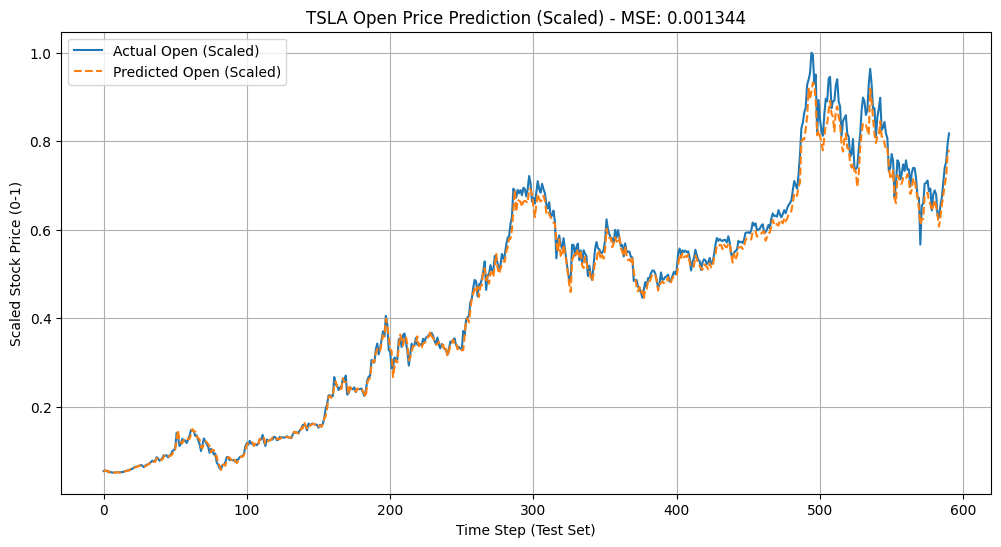

In [32]:
# 6. 결과 시각화 (Open 가격 기준, 0~1 스케일)
plt.figure(figsize=(12, 6))

plt.plot(y_test[:, 0], label='Actual Open (Scaled)')
plt.plot(pred_scaled[:, 0], label='Predicted Open (Scaled)', linestyle='--')

plt.title(f'TSLA Open Price Prediction (Scaled) - MSE: {mse_scaled:.6f}')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Scaled Stock Price (0-1)')
plt.legend()
plt.grid(True)
plt.show()